# Tabla de contenido
---
- <a href='#c1'> 1. Carga y exploracion de datos </a>
- <a href='#c2'> 2. Analisis de datos </a>
- <a href='#c3'> 3. Limpieza y procesamiento de datos </a>
- <a href='#c4'> 4. Construccion de modelos </a>
- <a href='#c5'> 5. Evaluacion de modelos y ajuste de hiperparametros </a>
- <a href='#c6'> 6. Resultados </a>

<a id='c1'></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:#333333; margin:0; ; padding:15px; font-size:100%; font:'Verdana'; background-color:#F5F5F5;border: 1px; overflow:hidden"><b>1. Cargar y explorar dataset</b></div>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import jovian

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
raw_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Descripcion de datos
Nuestro conjunto de datos consta de 3 archivos, `train.csv` lo ocuparemos para el entrenamiento de modelos, `test.csv` para probar y ajustarlos y por último `sample_submission.csv` sirve para reportar nuestras predicciones y subirlas en la plataforma kaggle para ver la precision conseguida.

## Estructura del dataset a entrenar
- **Numero de filas**: 230130
- **Numero de columnas**: 6
- **Data types**: 
  - 4 columnas son valores categoricos (`object`)
  - 1 columna es del tipo númerico con punto flotante (`float64`)
  - 1 columna es del tipo númerico de valor entero (`int64`)

## Columnas
1. **id**: Numero identificador de cada venta
2. **date**: Fecha de compra (YYYY/MM/DD)
3. **country**: Pais donde se realizo la venta
4. **product**: Nombre del producto vendido
5. **store**: Nombre de la tienda donde se vendio
6. **num_sold**: Numero de ventas
---

In [12]:
raw_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
raw_df.head(5)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [16]:
test_df.head(5)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [18]:
raw_df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


Podemos observar que justo nuestra variable a predecir es el numero de ventas `num_sold`

<a id='c2'></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:#333333; margin:0; ; padding:15px; font-size:100%; font:'Verdana'; background-color:#F5F5F5;border: 1px; overflow:hidden"><b>2. Analisis de datos</b></div>

In [22]:
valores_faltantes = raw_df.isnull().sum()
valores_faltantes

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [24]:
raw_df['num_sold'].describe()

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

<a id='c2.1'></a>
<div style="text-align:center; border-radius:15px; padding:15px; color:#333333; margin:0; font-size:150%; font:'Verdana'; background: #F5F5F5; background: #E8E8E8; border: 1px solid #CCCCCC; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); overflow:hidden;"><b>2.1. Date</b>
</div>

In [27]:
raw_df['date']= pd.to_datetime(raw_df['date'])
test_df['date']= pd.to_datetime(test_df['date'])

In [31]:
#Separamos la fecha en dias, meses y años para hacer un analisis mas detallado.
def add_dateparts(df,col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_nameday'] = df[col].dt.day_name()
add_dateparts(raw_df, "date")
add_dateparts(test_df, "date")

In [32]:
raw_df.head(5)

,id,date,country,store,product,num_sold,date_year,date_month,date_day,date_nameday
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1,Friday
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,Friday
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,Friday
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,Friday
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,Friday


In [33]:
test_df.head(5)

,id,date,country,store,product,date_year,date_month,date_day,date_nameday
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,2017,1,1,Sunday
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,2017,1,1,Sunday
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,Sunday
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,2017,1,1,Sunday
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,2017,1,1,Sunday


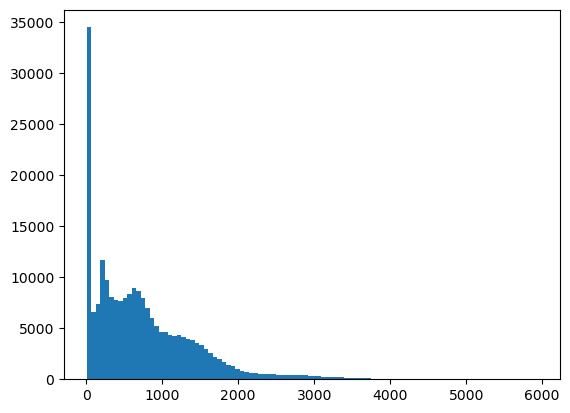

In [34]:
plt.hist(x='num_sold',bins=100,data = raw_df)
plt.show()

In [49]:
#Veamos las ventas totales por dia de la semana
ventas_por_dia_semana = raw_df.groupby('date_nameday', as_index=False)['num_sold'].sum()

In [51]:
dias_semana_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_semana['date_nameday'] = pd.Categorical(ventas_por_dia_semana['date_nameday'], categories=dias_semana_orden, ordered=True)
ventas_por_dia_semana = ventas_por_dia_semana.sort_values('date_nameday')

In [53]:
ventas_por_dia_semana

,date_nameday,num_sold
1,Monday,22399932.0
5,Tuesday,22405497.0
6,Wednesday,22416111.0
4,Thursday,22413187.0
0,Friday,23846915.0
2,Saturday,25194459.0
3,Sunday,27827355.0


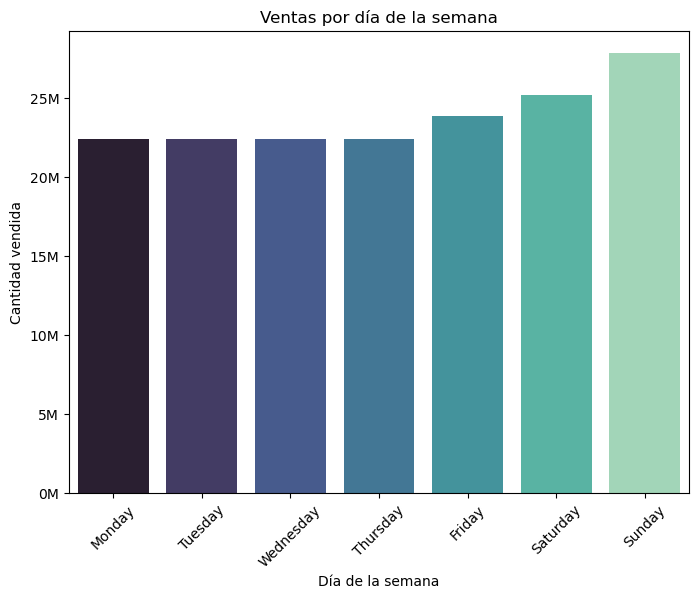

In [67]:
# Crear la figura y el eje
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_dia_semana, 
                 x='date_nameday', 
                 y='num_sold', 
                 #hue='date_nameday',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas por día de la semana")
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Cantidad vendida")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

In [95]:
Dia_con_mas_ventas=ventas_por_dia_semana.sort_values(by='num_sold', ascending=False).head(1)
Dia_con_mas_ventas

,date_nameday,num_sold
3,Sunday,27827355.0


In [101]:
Dia_con_menos_ventas=ventas_por_dia_semana.sort_values(by='num_sold', ascending=True).head(1)
Dia_con_menos_ventas

,date_nameday,num_sold
1,Monday,22399932.0


Este gráfico de barras ilustra la distribución total de ventas por día de la semana, donde el día con mayor número de ventas es el domingo, con ventas de 27.8 millones, mientras que el día con menor número de ventas es el lunes, con un monto aproximando de 22.4 millones. De igual forma, se puede apreciar que el número de ventas aumenta durante los fines de semana, lo que sugiere que, en nuestro modelo de predicción, las ventas realizadas en estos días deberían tener un mayor peso para predecir el número de ventas totales.

In [104]:
ventas_por_dia_mes = raw_df.groupby('date_day', as_index=False)['num_sold'].sum()

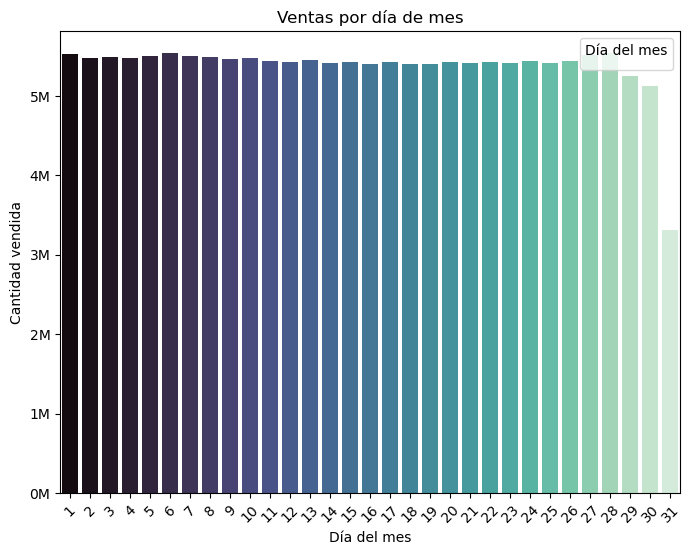

In [106]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_dia_mes, 
                 x='date_day', 
                 y='num_sold', 
                 #hue='date_month',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas por día de mes")
ax.set_xlabel("Día del mes")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="Día del mes")  # Agregar título a la leyenda
plt.show()

En este otro gráfico se muestra la distribución de ventas por día del mes, donde se observa que se mantienen bastante uniformes, con la excepción de fin de mes, en el que se nota una drástica disminución de las ventas el día 31. Asimismo, se muestra por color las ventas en cada mes, donde se aprecia que las ventas bajas registradas los días 31 se deben a que solo 7 meses cuentan con este número de días. Aunque es cierto que los días 29 y 30 también tienen un menor número de ventas, a pesar de que 12 meses incluyen estos días. Habrá que estudiar las cantidades para auqellos mese que solo contienen 31 dias y ver su distribución. 

In [114]:
ventas_por_mes = raw_df.groupby('date_month', as_index=False)['num_sold'].sum()

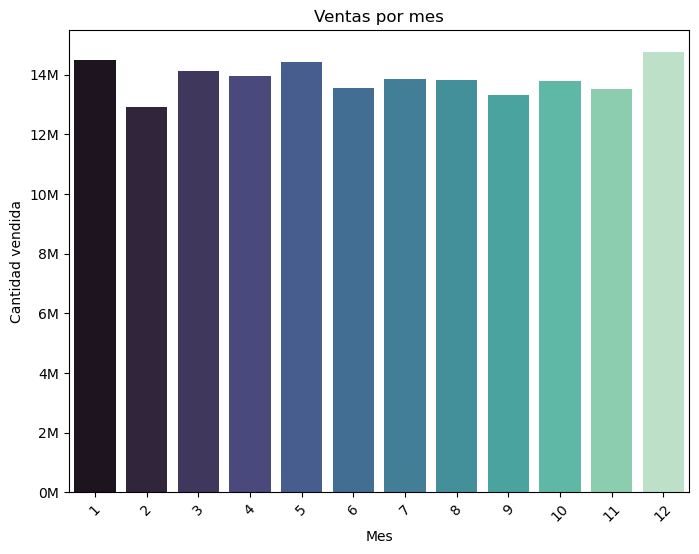

In [116]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_mes, 
                 x='date_month', 
                 y='num_sold', 
                 #hue='date_month',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas por mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
#plt.legend(title="Día del mes")  # Agregar título a la leyenda
plt.show()

In [120]:
Mes_con_mas_ventas=ventas_por_mes.sort_values(by='num_sold', ascending=False).head(1)
print('Mes con mas ventas')
Mes_con_mas_ventas

Mes con mas ventas


,date_month,num_sold
11,12,14752782.0


In [122]:
Mes_con_menos_ventas=ventas_por_mes.sort_values(by='num_sold', ascending=True).head(1)
print('Mes con menos ventas')
Mes_con_menos_ventas

Mes con menos ventas


,date_month,num_sold
1,2,12904154.0


Este gráfico muestra la distribución de ventas por mes, donde se aprecia que los meses con mayor número de ventas corresponden a diciembre y enero, superando los 14 millones. Este incremento en las ventas durante estos meses podría estar relacionado con la temporada de festividades, como Navidad y Año Nuevo, periodos en los que tradicionalmente aumenta el consumo. Por otro lado el mes con menor numero de ventas es febrero con aproximadamente 12.9 millones.

In [172]:
ventas_por_año = raw_df.groupby('date_year', as_index=False)['num_sold'].sum()

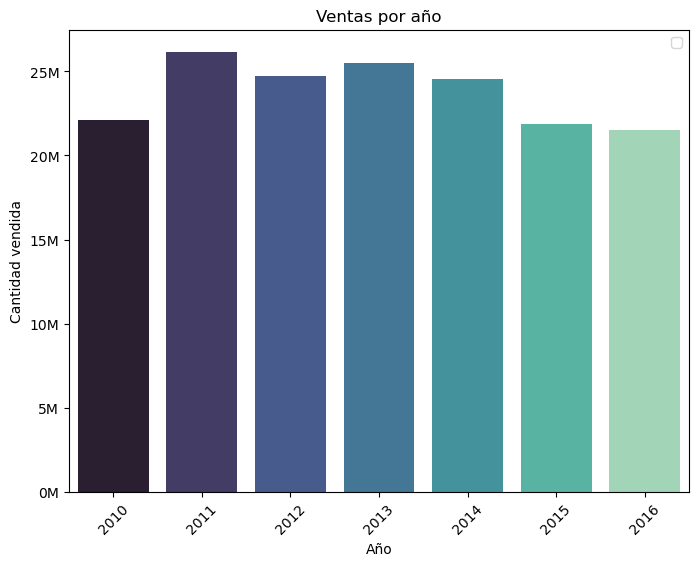

In [174]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_año, 
                 x='date_year', 
                 y='num_sold', 
                 #hue='product',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas por año")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="")  # Agregar título a la leyenda
plt.show()

Podemos ver que en el año 2011 se han vendido mas stickers mientras que en el año 2016 se han vendido menos, incluso se puede apreciar una tendencia de de disminucion de ventas a lo largo de los años. Nos preguntamos si puede deberse a la disminucion de ventas de algun solo sticker o si la distribucion de ventas se conserva infiriendo que las ventas disminuyeron en general o debido a un solo sticker. Veamoslo en el siguiene grafico.

In [177]:
ventas_por_año = raw_df.groupby(['product','date_year'], as_index=False)['num_sold'].sum()

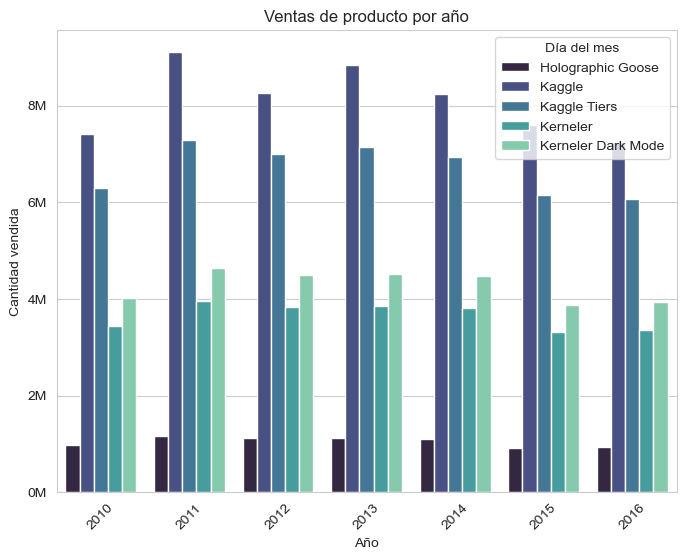

In [252]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_año, 
                 x='date_year', 
                 y='num_sold', 
                 hue='product',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas de producto por año")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="Día del mes")  # Agregar título a la leyenda
plt.show()

Este gráfico de barras muestra la distribución de ventas por año, diferenciado por colores que representan el número de ventas de cada producto. Se observa que el mayor número de ventas ocurrió en el año 2011, mientras que el año con menor volumen de ventas fue el 2016. La separación por colores permite visualizar que la distribución de ventas por producto se mantiene relativamente constante a lo largo de los años, lo que descarta la posibilidad de que algún producto esté siendo consumido en menor cantidad con el paso del tiempo. Esto sugiere que, aunque existen fluctuaciones en el volumen total de ventas anuales, la preferencia por los productos se mantiene estable, lo que podría indicar que factores externos, como condiciones económicas o cambios en el mercado, influyen más en las ventas totales que en la elección de los productos por parte de los consumidores. Este análisis refuerza la importancia de estudiar variables macroeconómicas y estrategias de marketing para comprender mejor las tendencias de ventas a lo largo del tiempo.

<a id='c2.2'></a>
<div style="text-align:center; border-radius:15px; padding:15px; color:#333333; margin:0; font-size:150%; font:'Verdana'; background: #F5F5F5; background: #E8E8E8; border: 1px solid #CCCCCC; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); overflow:hidden;"><b>2.2. Country</b>
</div>

In [166]:
ventas_por_pais = raw_df.groupby('country', as_index=False)['num_sold'].sum()


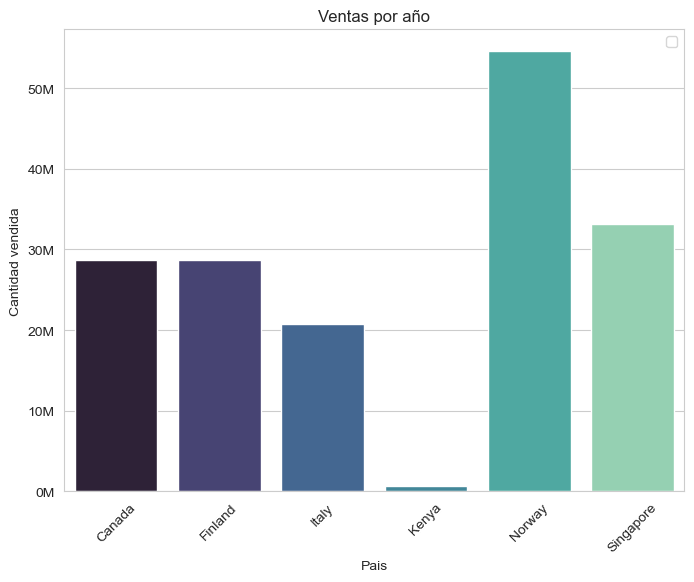

In [227]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_pais, 
                 x='country', 
                 y='num_sold', 
                 #hue='product',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas por año")
ax.set_xlabel("Pais")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="")  # Agregar título a la leyenda
plt.show()

In [208]:
Pais_con_mas_ventas=ventas_por_pais.sort_values(by='num_sold', ascending=False).head(1)
Pais_con_menos_ventas=ventas_por_pais.sort_values(by='num_sold', ascending=True).head(1)

In [210]:
print("Pais con menos ventas")
Pais_con_menos_ventas

Pais con menos ventas


,country,num_sold
3,Kenya,689141.0


In [212]:
print("Pais con mas ventas")
Pais_con_mas_ventas

Pais con mas ventas


,country,num_sold
4,Norway,54562305.0


Este gráfico de barras muestra la cantidad de ventas totales por país, destacando claramente que Kenia es el país con el menor volumen de ventas, registrando un total de 689.141 mil, una cifra que contrasta significativamente con los 54.56231 millones de Noruega, el país con mayor número de ventas. Esta marcada diferencia podría deberse a diversos factores, como diferencias en el poder adquisitivo, hábitos de consumo, penetración de mercado o incluso aspectos culturales y geográficos. Para abordar esta brecha, sería recomendable realizar estudios de mercado más profundos que permitan identificar las barreras específicas en Kenia y desarrollar estrategias de marketing adaptadas a las necesidades y características de ese mercado.

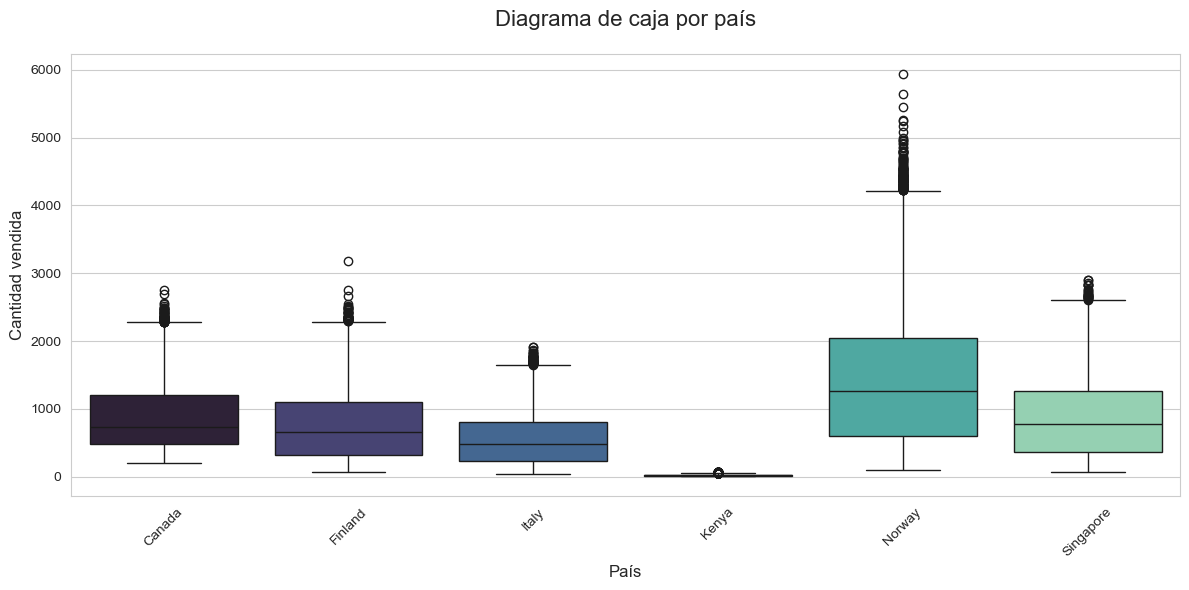

In [229]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(data=raw_df, 
                 x='country', 
                 y='num_sold', 
                 palette='mako')

# Personalizar el gráfico
plt.title("Diagrama de caja por país", fontsize=16, pad=20)
plt.xlabel("País", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
##plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

In [240]:
mediana_por_pais = raw_df.groupby('country')['num_sold'].median()
mediana_por_pais

country
Canada        731.0
Finland       665.0
Italy         480.0
Kenya          18.0
Norway       1261.0
Singapore     772.0
Name: num_sold, dtype: float64

En estos diagramas de caja se muestra la distribución de las ventas por país, así como las medias de la cantidad vendida al cliente, las cuales varían significativamente dependiendo del país. Los valores medios son los que se muestran en la tabla anterior

Estos datos reflejan diferencias notables en el comportamiento de compra entre los países, destacando Noruega como el país con el mayor promedio de ventas por cliente, mientras que Kenia registra el valor más bajo. Además, se pueden apreciar varios valores atípicos en la distribución de ventas, los cuales podrían distorsionar los análisis y modelos predictivos. Por ello, para futuros entrenamientos de modelos, se recomienda remover estos valores atípicos con el fin de obtener resultados más precisos y representativos. Esta limpieza de datos permitirá mejorar la calidad de las predicciones y optimizar las estrategias de ventas adaptadas a cada mercado.

<a id='c2.3'></a>
<div style="text-align:center; border-radius:15px; padding:15px; color:#333333; margin:0; font-size:150%; font:'Verdana'; background: #F5F5F5; background: #E8E8E8; border: 1px solid #CCCCCC; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); overflow:hidden;"><b>2.3. Store</b>
</div>

In [248]:
ventas_por_tienda = raw_df.groupby(['product','store'], as_index=False)['num_sold'].sum()

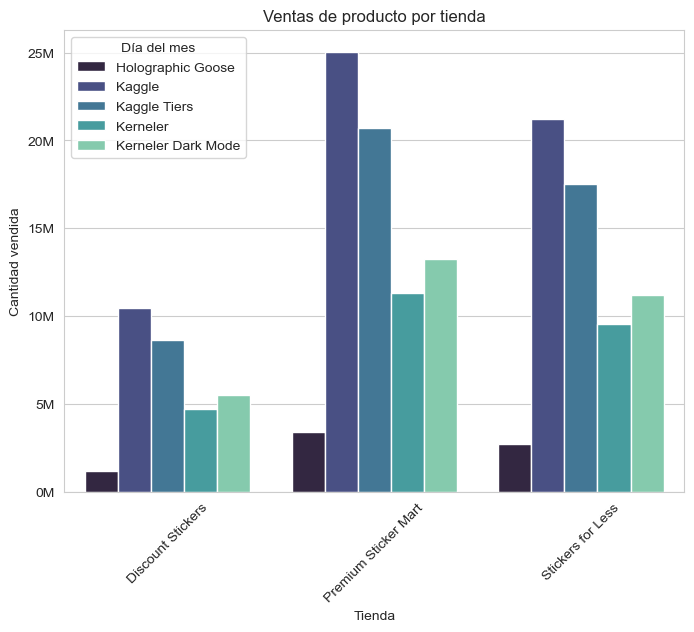

In [254]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=ventas_por_tienda,
                 x='store',
                 y='num_sold',
                 hue='product',
                 palette = 'mako')
ax.set_title("Ventas de producto por tienda")
ax.set_xlabel("Tienda")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="Día del mes")  # Agregar título a la leyenda
plt.show()

Este gráfico de barras muestra la cantidad de ventas por tienda, diferenciado por colores que representan cada producto. Es evidente que la tienda con mayor número de ventas es *Premium Sticker Mart*, mientras que la tienda con menor número de ventas es *Discount Stickers*. La distribución de colores en cada barra sugiere que la proporción de ventas por producto es similar en todas las tiendas lo que indica un comportamiento de consumo consistente a nivel de producto. Esto podría deberse a factores como la popularidad de la marca, la calidad de los productos o las estrategias de marketing implementadas por Premium Sticker Mart. Por otro lado, el bajo desempeño de Discount Stickers podría estar relacionado con su posicionamiento en el mercado, la percepción de su calidad o la falta de promociones efectivas. 

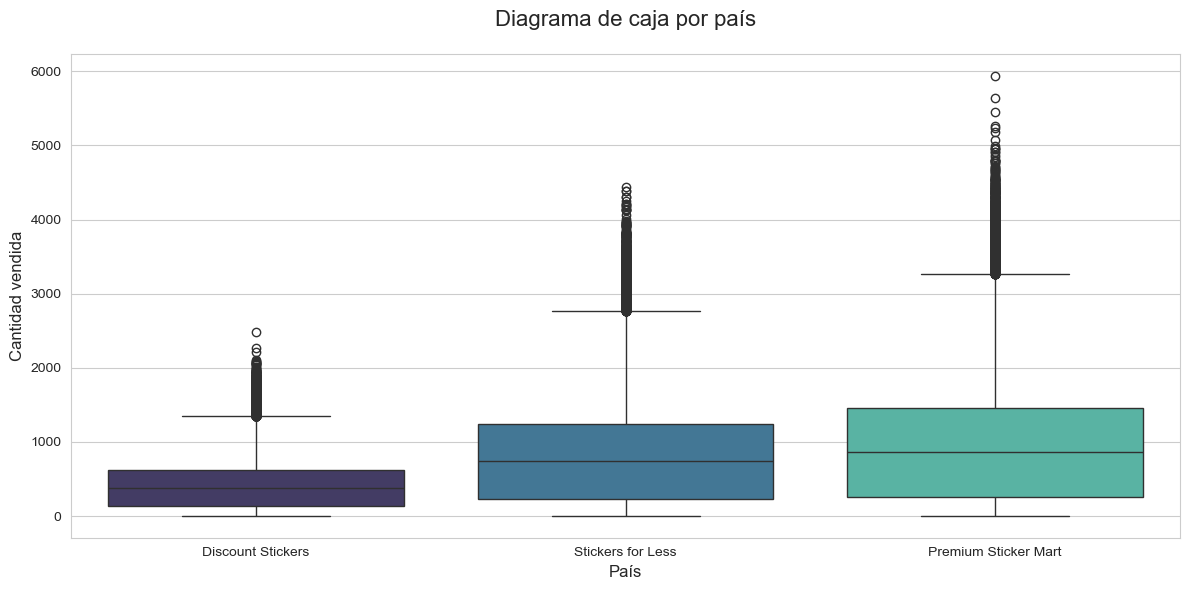

In [256]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(data=raw_df, 
                 x='store', 
                 y='num_sold', 
                 palette='mako')

# Personalizar el gráfico
plt.title("Diagrama de caja por tienda", fontsize=16, pad=20)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
##plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

In [258]:
mediana_por_tienda = raw_df.groupby('store')['num_sold'].median()
mediana_por_tienda

store
Discount Stickers       380.0
Premium Sticker Mart    859.0
Stickers for Less       744.0
Name: num_sold, dtype: float64

En estos diagramas de caja se muestra la distribución de las ventas por tienda, así como las medianas de cantidad vendida al cliente, las cuales varían significativamente dependiendo de la tienda. Los valores medios son los siguientes:

- Discount Stickers:
- Finlandia: 380
- Sticker for Less: 744
- Premium Sticker Mart: 859

Estos datos reflejan diferencias notables en el comportamiento de compra por tienda, destacando a Premium Sticker Mart como la tienda con el mayor promedio de ventas por cliente, mientras que Discount Stickers registra el valor más bajo. Esta disparidad podría deberse a factores como el posicionamiento de la marca, la calidad percibida de los productos, las estrategias de precios o la experiencia del cliente. Además, se observan varios valores atípicos en la distribución de ventas, los cuales podrían afectar la precisión de los análisis y modelos predictivos. Por ello, se recomienda remover estos valores atípicos para garantizar un futuro modelo más eficiente y representativo.

<a id='c2.4'></a>
<div style="text-align:center; border-radius:15px; padding:15px; color:#333333; margin:0; font-size:150%; font:'Verdana'; background: #F5F5F5; background: #E8E8E8; border: 1px solid #CCCCCC; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); overflow:hidden;"><b>2.4. Product</b>
</div>

In [278]:
ventas_por_producto = raw_df.groupby(['product','country'], as_index=False)['num_sold'].sum()

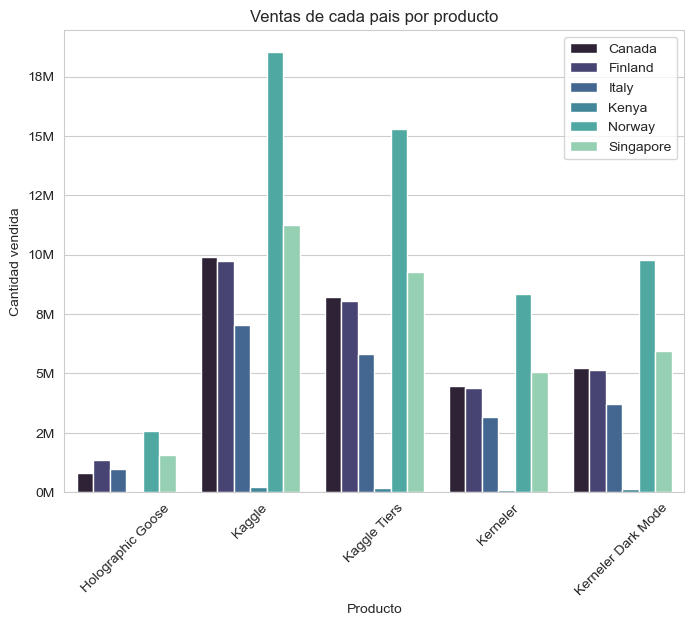

In [286]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=ventas_por_producto, 
                 x='product', 
                 y='num_sold', 
                 hue='country',
                palette = 'mako')

# Personalizar el gráfico
ax.set_title("Ventas de cada pais por producto")
ax.set_xlabel("Producto")
ax.set_ylabel("Cantidad vendida")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title="")  # Agregar título a la leyenda
plt.show()

Aquí tenemos un diagrama de barras que muestra la cantidad de ventas por producto, diferenciado por colores que representan cada país. Se observa que Kaggle es el producto más vendido, mientras que Holographic Goose es el que registra el menor número de ventas. Este comportamiento sugiere que la preferencia por ciertos productos es consistente en todos los países, descartando la posibilidad de que un producto se venda más o menos dependiendo de la ubicación geográfica. Esto podría indicar que factores como la popularidad del producto, su utilidad o su atractivo visual tienen un impacto global, independientemente del mercado específico. Sin embargo, sería recomendable realizar un análisis más profundo para identificar si existen diferencias sutiles en la demanda por país que no son evidentes en este gráfico.

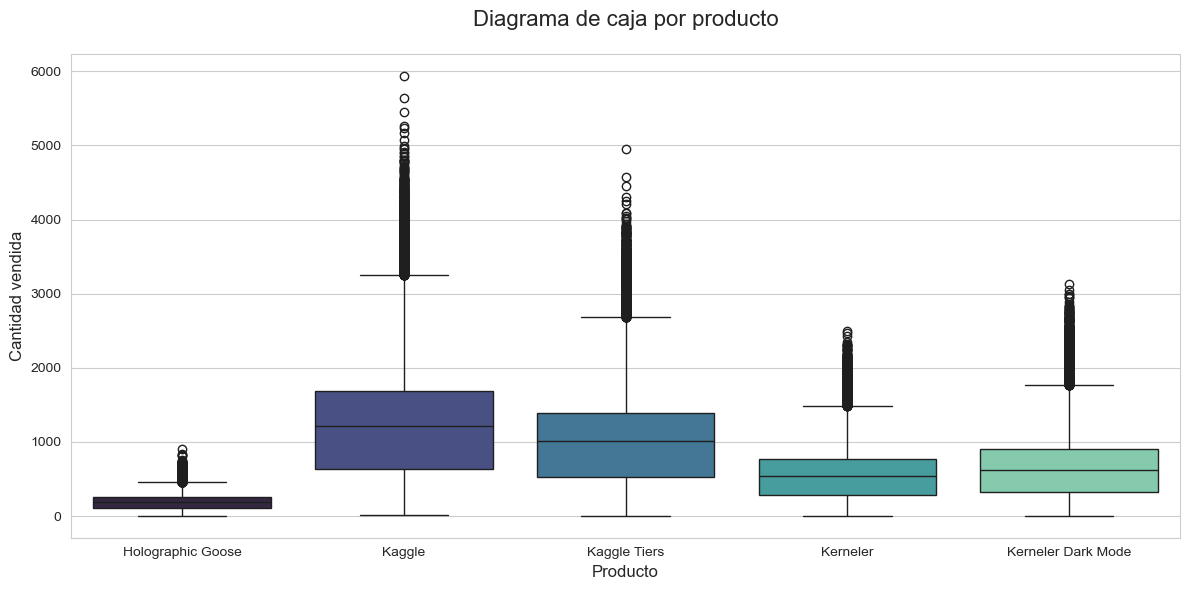

In [288]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(data=raw_df, 
                 x='product', 
                 y='num_sold', 
                 palette='mako')

# Personalizar el gráfico
plt.title("Diagrama de caja por producto", fontsize=16, pad=20)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Cantidad vendida", fontsize=12)
##plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

In [294]:
mediana_por_producto = raw_df.groupby('product')['num_sold'].median()
mediana_por_producto

product
Holographic Goose      192.0
Kaggle                1215.0
Kaggle Tiers          1007.0
Kerneler               537.0
Kerneler Dark Mode     617.0
Name: num_sold, dtype: float64

Finalmente, realizamos un diagrama de caja para evidenciar la mediana de ventas de cada producto, así como los valores atípicos que serán de vital importancia para el entrenamiento de nuestro modelo. Las medias de ventas de cada producto son las siguientes:
- Holographic Goose: 192
- Kaggle: 1215
- Kaggle Tiers: 1007 
- Kerneler: 537
- Kerneler Dark Mode: 617
Estos datos muestran una clara diferencia en el desempeño de cada producto, destacando Kaggle como el producto con mayor número de ventas promedio, mientras que Holographic Goose registra el valor más bajo. Además, el diagrama de caja permite identificar la presencia de valores atípicos en la distribución de ventas, los cuales podrían distorsionar los resultados del modelo si no se manejan adecuadamente.

<a id='c3'></a>
<div style="text-align:center; border-radius:15px; padding:15px; color:#333333; margin:0; font-size:150%; font:'Verdana'; background: #F5F5F5; background: #E8E8E8; border: 1px solid #CCCCCC; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); overflow:hidden;"><b>3. Limpieza y procesamiento de datos</b>
</div>

A los valores faltantes los imputaremos por el promedio del numero de ventas

In [296]:
train_clean_df= raw_df.fillna(raw_df.num_sold.mean())

train_clean_df.isna().sum()

id              0
date            0
country         0
store           0
product         0
num_sold        0
date_year       0
date_month      0
date_day        0
date_nameday    0
dtype: int64

Vemos que existen varios outliers para cada numero de stickers vendidos en diferentes paises, existiendo una gran cantidad de ellos en Norway. Por otro lado para los valores en tienda y producto existen tambien una gran cantidad de outliers. Limpiaremos mas adelante estos datos.

Removiendo los outliers que nos muestran los boxplots anteriores

In [320]:
outliers = train_clean_df[
### Outliers de paises
(((train_clean_df['country']=='Canada') & (train_clean_df['num_sold']>=2274))|
((train_clean_df['country']=='Norway') & (train_clean_df['num_sold']>=2047))|
((train_clean_df['country']=='Finland') & (train_clean_df['num_sold']>=2286))|
((train_clean_df['country']=='Singapore') & (train_clean_df['num_sold']>=2610))|
((train_clean_df['country']=='Italy') & (train_clean_df['num_sold']>=1652)))|
###Outliers de productos
(((train_clean_df['product']=='Kaggle') & (train_clean_df['num_sold']>=3250))|
((train_clean_df['product']=='Kaggle Tiers') & (train_clean_df['num_sold']>=2681))|
((train_clean_df['product']=='Kerneler') & (train_clean_df['num_sold']>=1490))|
((train_clean_df['product']=='Kerneler Dark Mode') & (train_clean_df['num_sold']>=1768))|
((train_clean_df['product']=='Holographic Goose') & (train_clean_df['num_sold']>=463)))|
###Outliers de tiendas
(((train_clean_df['store']=='Discount Stickers') & (train_clean_df['num_sold']>=1347))|
((train_clean_df['store']=='Stickers for Less') & (train_clean_df['num_sold']>=2766))|
((train_clean_df['store']=='Premium Sticker Mart') & (train_clean_df['num_sold']>=3265)))
]

In [322]:
indices_a_eliminar = outliers.index
train_clean_df = train_clean_df.drop(indices_a_eliminar)

In [326]:
#1. Dividimos el train_clean_df en 2 conjuntos, uno de entrenamiento y otro de validacion, 
# dejando el orden de las fechas cronologicamente pues deseamos hacer predicciones a futuro
train_df, val_df = train_test_split(train_clean_df, test_size = 0.2, shuffle = False)

#2. Definimos las columnas que seran nuestras variables y nuestra columna objetivo
input_cols = ['country', 'store', 'product', 'date_year', 'date_month', 'date_day', 'date_nameday']
target_col = 'num_sold'

#3. Separamos las columnas de acuerdo al objetivo, si son target o input.
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]
test_inputs = test_df[input_cols]

#4 Identificamos la columnas numericas y categoricas para ocupar OneHotEncoding adecuadamente
numerical_cols = ['date_day']
categorical_cols = ['country', 'store', 'product', 'date_year', 'date_month', 'date_nameday']

#5. Codificamos las columnas categoricas
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

#6. Nombramos los conjuntos que ocuparemos para entrenar, validar y probar nuestro modelo
X_train = train_inputs[encoded_cols + numerical_cols]
X_val = val_inputs[encoded_cols + numerical_cols]
X_test = test_inputs[encoded_cols + numerical_cols]

C:\Users\victo\AppData\Local\Temp\ipykernel_2944\4047964080.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\victo\AppData\Local\Temp\ipykernel_2944\4047964080.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\victo\AppData\Local\Temp\ipykernel_2944\4047964080.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

<a id='c3'></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:#333333; margin:0; ; padding:15px; font-size:100%; font:'Verdana'; background-color:#F5F5F5;border: 1px; overflow:hidden"><b> 4. Construcción del modelo </b></div>

Ocuparemos diferentes tipos de modelos y ajustaremos los parametros para aquellos que presenten mejor precision de datos 

In [374]:
def testing_model(model, name):

    model.fit(X_train, train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    score_train = model.score(X_train, train_targets)
    score_val = model.score(X_val, val_targets)

    print(f"{name}\n"
      f"Métricas de entrenamiento:\n"
      f"  - Mean Squared Error: {train_rmse}\n"
      f"  - Score R²: {score_train}\n"
      f"Métricas de validación:\n"
      f"  - Mean Squared Error: {val_rmse}\n"
      f"  - Score R²: {score_val}")


In [398]:
def weights_model(model):
    # Ajustamos el modelo
    model.fit(X_train, train_targets)
    
    
    weights_df = pd.DataFrame({
        'feature': np.append(X_train.columns, 'intercept'),
        'weight': np.append(model.coef_, model.intercept_)})
    
    # Ordenamos el df y lo graficamos
    weights_sort = weights_df.sort_values('weight', ascending=True)
    
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    ax = sns.barplot(data=weights_sort,
                    x='weight',
                    y='feature',
                    palette='mako')  

    plt.title("Importancia de las características", fontsize=16, pad=20)
    plt.xlabel("Weight (Importancia)", fontsize=12)
    plt.ylabel("Feature (Característica)", fontsize=12)
    ax.set(xmargin=0.1)
    ax.yaxis.set_tick_params(labelsize=10)
    plt.tight_layout()

    fig = ax.get_figure() 
    plt.close()
    
    return fig

In [417]:
def importance_feature(model):
    # Ajustamos el modelo
    model.fit(X_train, train_targets)
    
    # Creamos el DataFrame con los pesos
    weights_df = pd.DataFrame({
        'feature': X_train.columns,
        'weight': model.feature_importances_
    })
    
    # Ordenamos el df
    weights_sort = weights_df.sort_values('weight', ascending=False)
    
    # Configuración del gráfico
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")
    
    # Crear el gráfico de barras horizontal
    ax = sns.barplot(
        data=weights_sort,
        x='weight',
        y='feature',
        palette='mako'
    )
    
    plt.title("Importancia de las características", fontsize=16, pad=20)
    plt.xlabel("Importancia", fontsize=12)
    plt.ylabel("Característica", fontsize=12)
    
    ax.set(xmargin=0.1)
    
    ax.yaxis.set_tick_params(labelsize=10)
    
    plt.tight_layout()
    
    fig = ax.get_figure()
    plt.close()  # Evita duplicados en notebooks
    
    return fig

<a id='c5'></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:#333333; margin:0; ; padding:15px; font-size:100%; font:'Verdana'; background-color:#F5F5F5;border: 1px; overflow:hidden"><b> 5. Evaluación de modelos y ajuste de hiperparametros </b></div>

## Regresion lineal

In [404]:
%%time
testing_model(LinearRegression(), 'Regresion Lineal')

Regresion Lineal
Métricas de entrenamiento:
  - Mean Squared Error: 216.2113520857772
  - Score R²: 0.8318882418908716
Métricas de validación:
  - Mean Squared Error: 229.42549486515782
  - Score R²: 0.8064821903725722
CPU times: total: 609 ms
Wall time: 429 ms


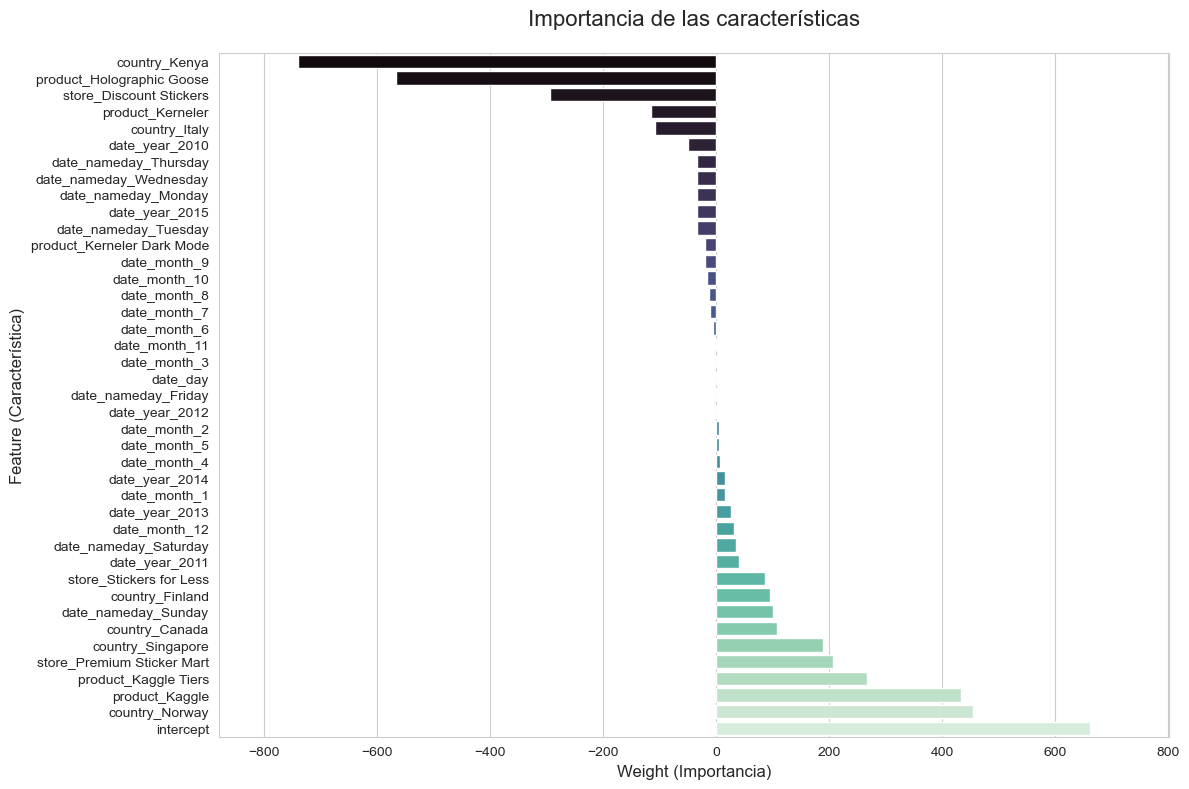

In [405]:
weights_model(LinearRegression())

## Regresión de Ridge

In [350]:
%%time
testing_model(Ridge(), 'Ridge')

Ridge
Métricas de entrenamiento:
  - Mean Squared Error: 216.21135309744196
  - Score R²: 0.8318882403176634
Métricas de validación:
  - Mean Squared Error: 229.42144227223258
  - Score R²: 0.8064890269447686
CPU times: total: 438 ms
Wall time: 328 ms


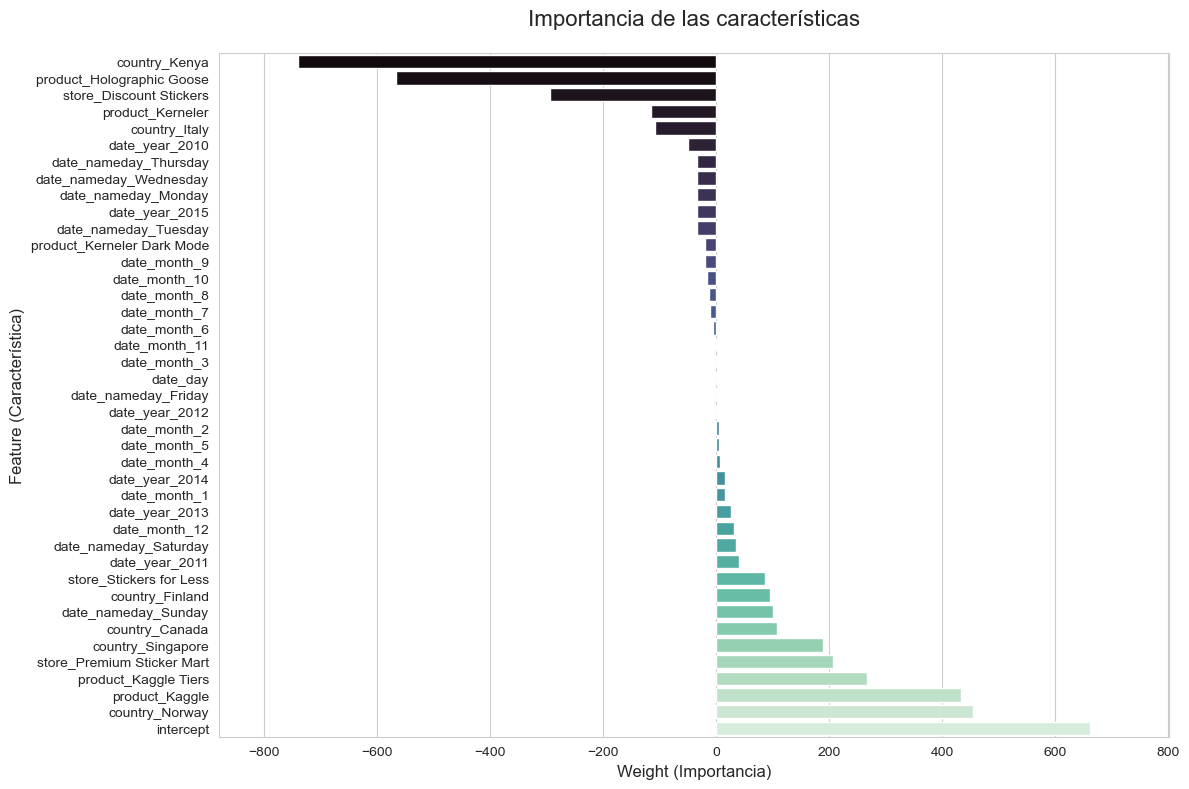

In [352]:
weights_model(Ridge())

## SGD Regressor

In [354]:
%%time
testing_model(SGDRegressor(), 'SGD Regressor')

SGD Regressor
Métricas de entrenamiento:
  - Mean Squared Error: 223.84128209920564
  - Score R²: 0.8198138217326423
Métricas de validación:
  - Mean Squared Error: 237.51534719977414
  - Score R²: 0.7925941796848013
CPU times: total: 5.11 s
Wall time: 5.25 s


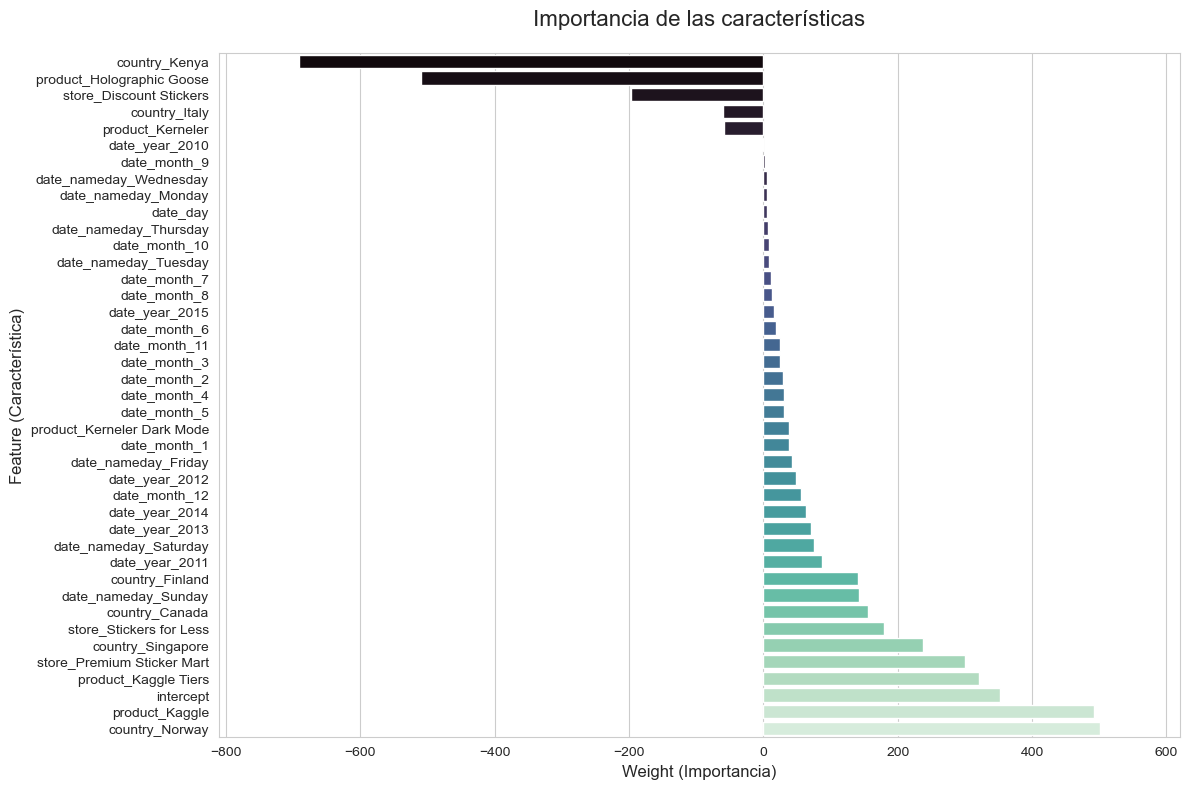

In [356]:
weights_model(SGDRegressor())

Los modelos Ridge y Regresión Lineal asignan un mayor peso de predicción a las siguientes características:
- country_Kenya
- country_Norway
- product_Kerneler
- store_Premium Sticker Mart
- date_nameday_Sunday

Mientras que las caracteristicas con mayor peso para SGD Regressor son:
- country_Kenya
- product_Kaggle
- country_Italy
- store_Premium Sticker Mart
- date_day

Estos resultados indican que Kenya es un factor muy importante para predecir el número de ventas, lo cual coincide con el análisis de datos previo, donde se observó que Kenia fue, por un gran margen, el país con menor volumen de ventas. Este comportamiento sugiere que las condiciones específicas del mercado en Kenia, como el poder adquisitivo, los hábitos de consumo o la penetración de productos, tienen un impacto significativo en las ventas. Además, se destaca la importancia de Premium Sticker Mart como la tienda con mayor influencia en las predicciones, lo que refuerza su posición dominante en el mercado.

Por otro lado, características como date_nameday_Sunday y date_day resaltan la relevancia de los factores temporales en las ventas, lo que sugiere que los días específicos y los fines de semana tienen un impacto considerable en el comportamiento de los consumidores. Finalmente, productos como Kerneler y Kaggle también muestran un peso significativo, lo que indica que la elección del producto es un factor clave en las predicciones.

Por otro lado, podemos observar que estos modelos lineales de regresión presentan un Error Cuadrático Medio (MSE) similar, tanto para el conjunto de entrenamiento como para el conjunto de validación. Esto sugiere que los modelos tienen un rendimiento comparable en términos de precisión. Sin embargo, cabe resaltar que, de los tres modelos, SGD Regressor presenta ligeramente mejores resultados, aunque a costa de un mayor tiempo de ejecución. Esto podría deberse a su enfoque iterativo y su capacidad para manejar grandes volúmenes de datos de manera eficiente, aunque con un costo computacional más alto.

## Arbol de decisión

In [358]:
%%time
testing_model(DecisionTreeRegressor(), 'Arbol de desicion')

Arbol de desicion
Métricas de entrenamiento:
  - Mean Squared Error: 3.845433172339315e-15
  - Score R²: 1.0
Métricas de validación:
  - Mean Squared Error: 134.564963205603
  - Score R²: 0.933426470952958
CPU times: total: 2.19 s
Wall time: 2.28 s


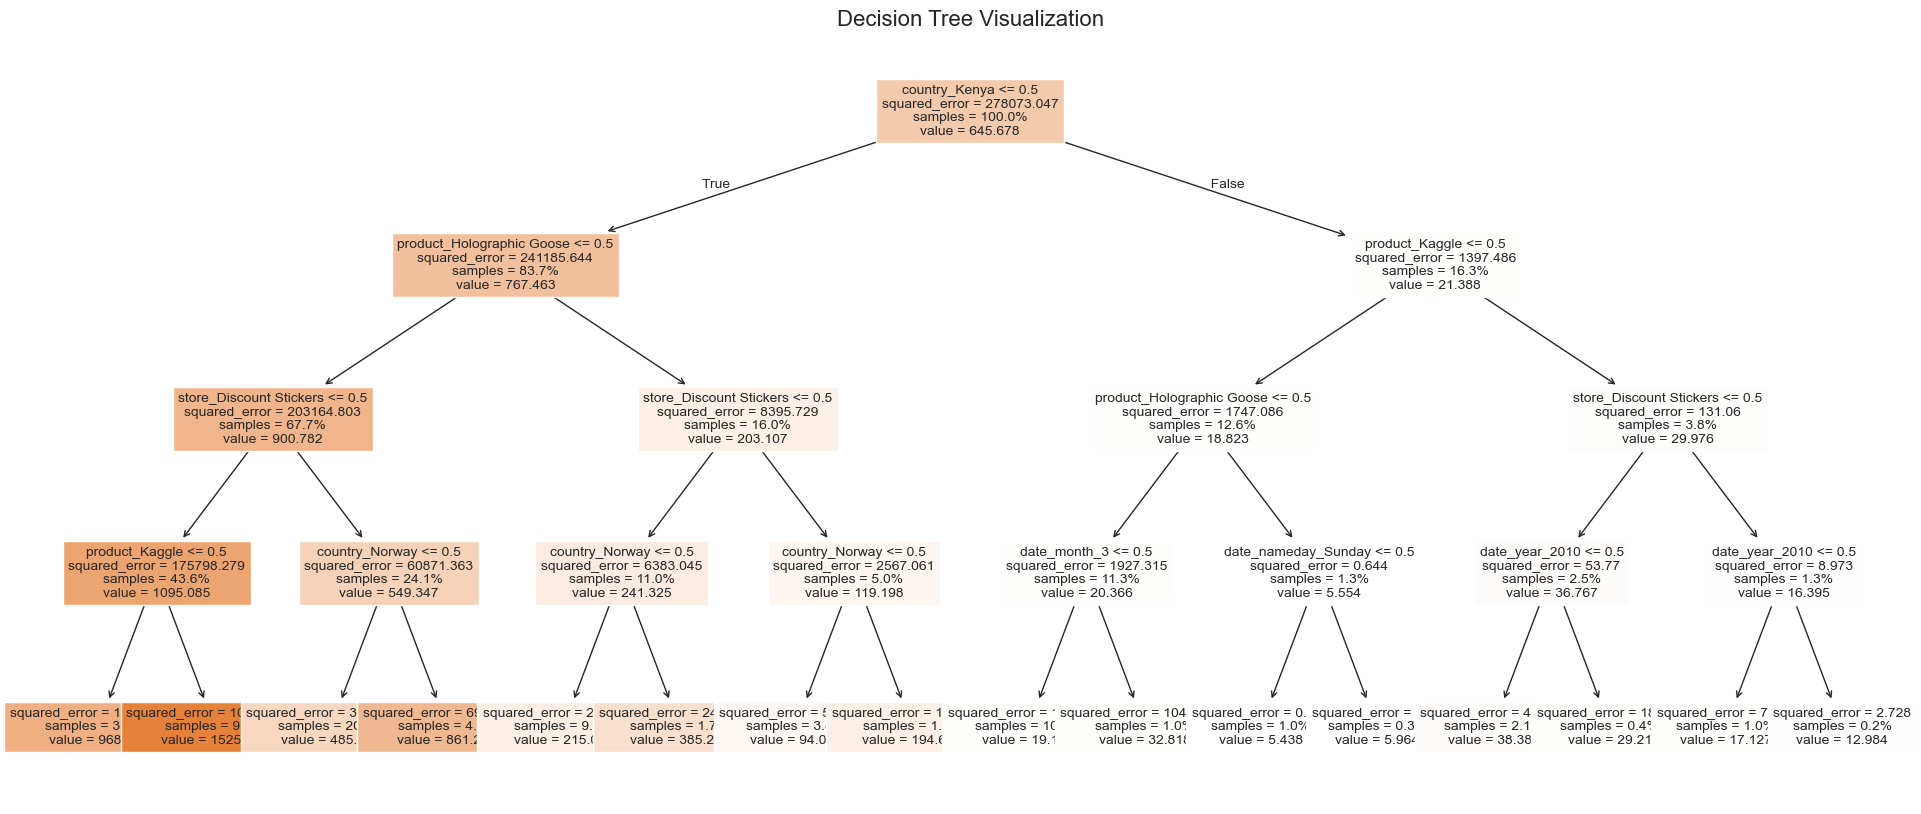

In [360]:
def visualize_decision_tree(model, feature_names, max_depth=None):
    plt.figure(figsize=(24, 10))  # Increase figure size
    plot_tree(model, 
              feature_names=feature_names, 
              filled=True, 
              fontsize=10, 
              proportion=True, 
              max_depth=max_depth) 
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.show()

# Entrenamos un modelo de regresion con maximo 4 para su visualizacion
decision_tree_model = DecisionTreeRegressor(max_depth=4)  # Limit depth to 4
decision_tree_model.fit(X_train, train_targets)

# Visualize the improved tree
visualize_decision_tree(decision_tree_model, feature_names=X_train.columns)

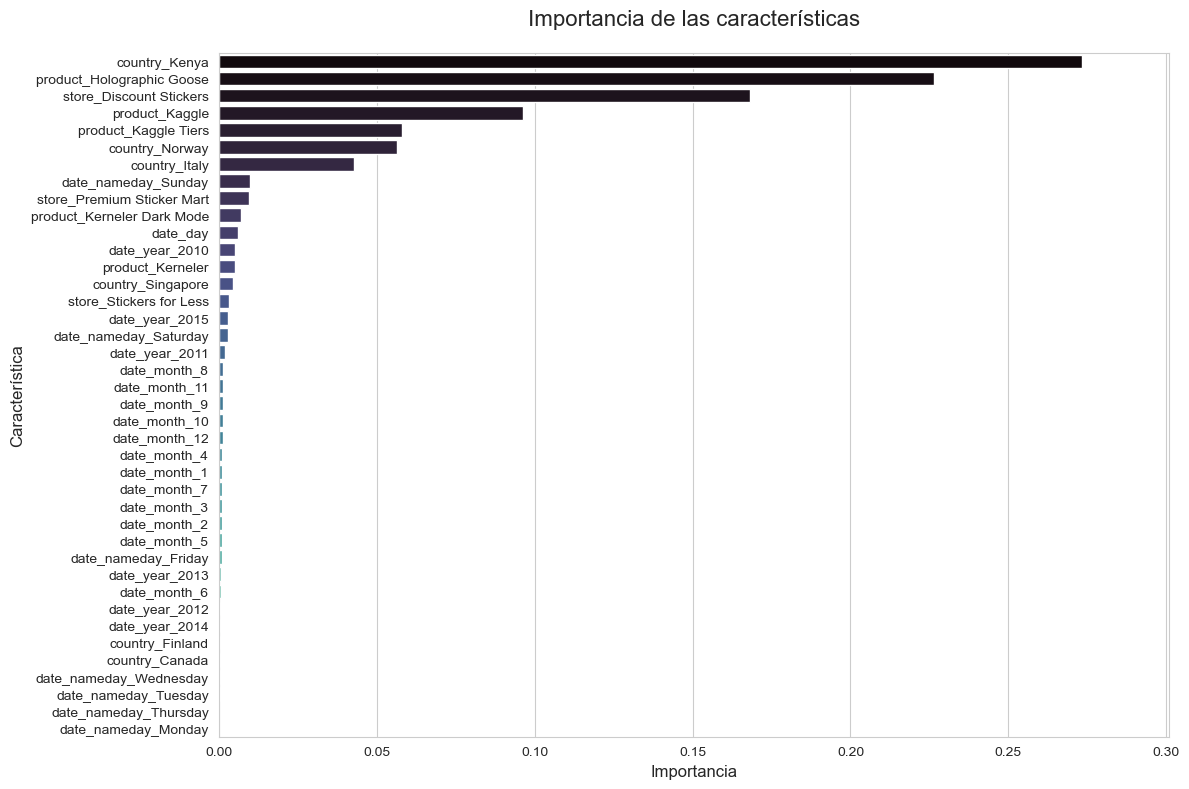

In [366]:
importance_feature(DecisionTreeRegressor())

De acuerdo a los valores de MSE Y $R^2$ podemos ver que presenta mejores resultados aunque se nota que nuestro modelo esta sobreajustado por lo tanto conviene encontrar los valores optimos para los hiperparametros del modelo.

In [409]:
def testing_params(modelo,**params):
    model = modelo(random_state=42, **params)
    model.fit(X_train, train_targets)
    
    train_error = 1 - model.score(X_train, train_targets) 
    val_error = 1 - model.score(X_val, val_targets)
    return { **params,'Training Error': train_error, 'Validation Error': val_error}

## Max Depth

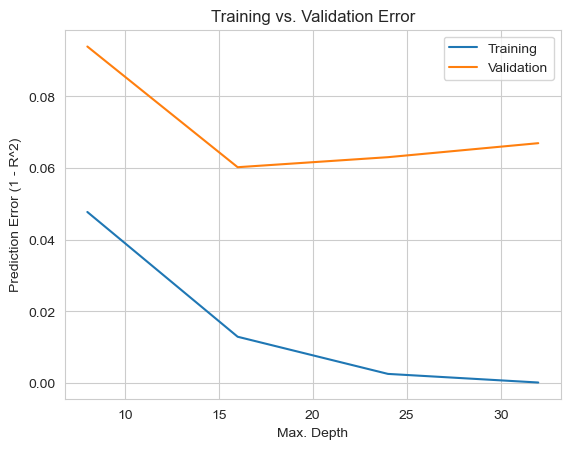

In [371]:
testing_params_df = pd.DataFrame([testing_params(DecisionTreeRegressor, max_depth=8*i ) for i in range(1, 5)])
plt.figure()
plt.plot(testing_params_df['max_depth'], testing_params_df['Training Error'])
plt.plot(testing_params_df['max_depth'], testing_params_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - R^2)')
plt.legend(['Training', 'Validation'])
plt.show()

In [411]:
testing_params_df.sort_values('Validation Error', ascending=True).head(1)

,max_depth,Training Error,Validation Error
1,16,0.012899,0.06022


El valor más óptimo es **max_depth=16**

Veamos ahora el numero maximo de hojas.

## Max Leaf Nodes

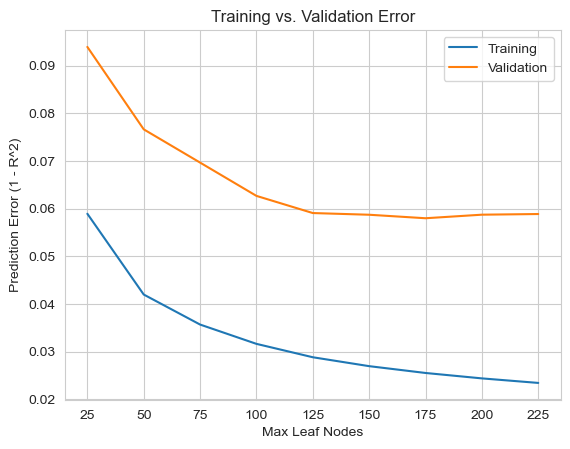

In [413]:
testing_params_df = pd.DataFrame([testing_params(DecisionTreeRegressor, max_depth = 16, max_leaf_nodes=25*i) for i in range(1, 10)])
plt.figure()
plt.plot(testing_params_df['max_leaf_nodes'], testing_params_df['Training Error'])
plt.plot(testing_params_df['max_leaf_nodes'], testing_params_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Prediction Error (1 - R^2)')
plt.legend(['Training', 'Validation'])
plt.show()

In [414]:
testing_params_df.sort_values('Validation Error', ascending=True).head(1)

,max_depth,max_leaf_nodes,Training Error,Validation Error
6,16,175,0.025511,0.057986


Podemos ver que **max_leaf_nodes=175** es un valor optimo pues apartir de ahi la el error de validacion empieca a crecer. Veamos cuanto mejora el ajuste con estos hiperparametros.

In [419]:
%%time
testing_model(DecisionTreeRegressor(max_depth=16, max_leaf_nodes = 175, random_state=42), 'Arbol de desicion')

Arbol de desicion
Métricas de entrenamiento:
  - Mean Squared Error: 84.2252625618476
  - Score R²: 0.9744890958088306
Métricas de validación:
  - Mean Squared Error: 125.58626676191973
  - Score R²: 0.9420141688454513
CPU times: total: 1.11 s
Wall time: 1.36 s


### El modelo con este ajuste presenta mejores resultados para el conjunto de validación. Veamos si mejora y cuanto con un modelo de Random Forest

## Random Forest

In [421]:
%%time
testing_model(RandomForestRegressor(), 'Random Forest')

Random Forest
Métricas de entrenamiento:
  - Mean Squared Error: 20.278778376791063
  - Score R²: 0.9985211481038118
Métricas de validación:
  - Mean Squared Error: 124.38662452063558
  - Score R²: 0.9431166781121589
CPU times: total: 2min 13s
Wall time: 2min 44s


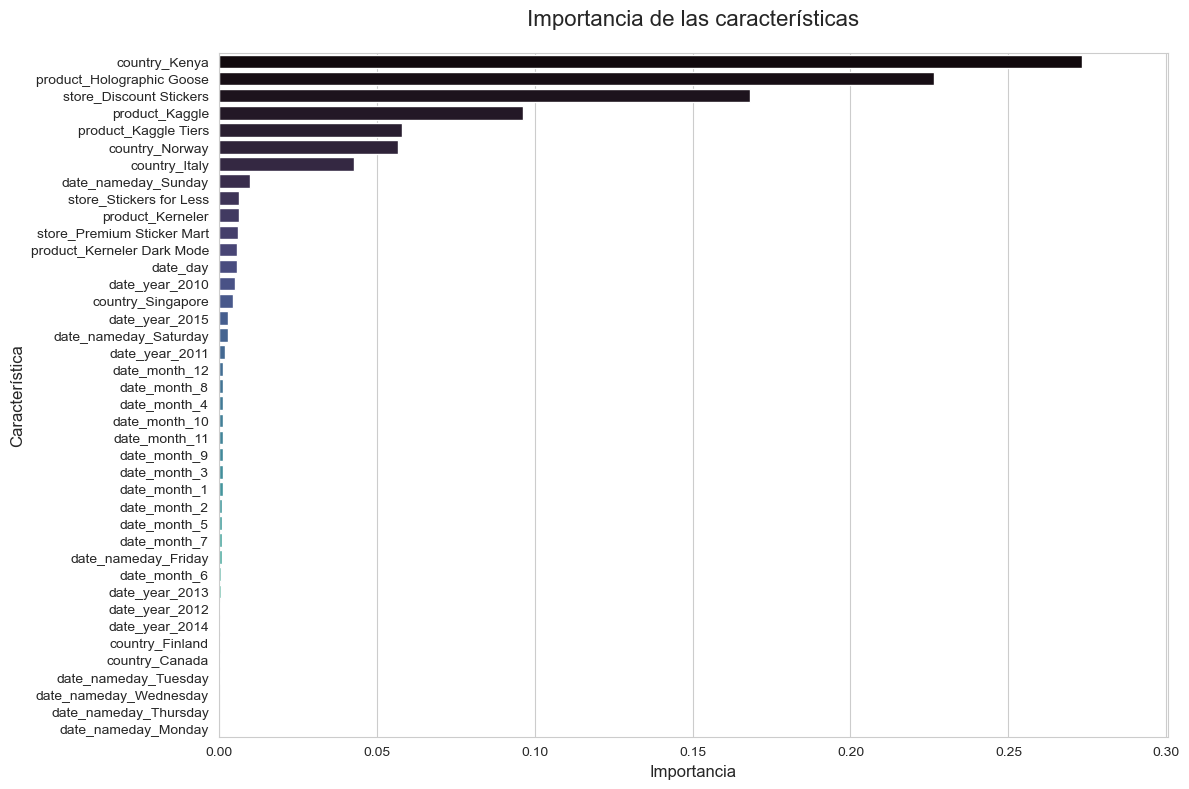

In [422]:
importance_feature(RandomForestRegressor())

De igual forma que en el modelo anterior, hallaremos el valor de los hiperparametros más óptimo. Comencemos con `n_estimators`

## N Estimators 

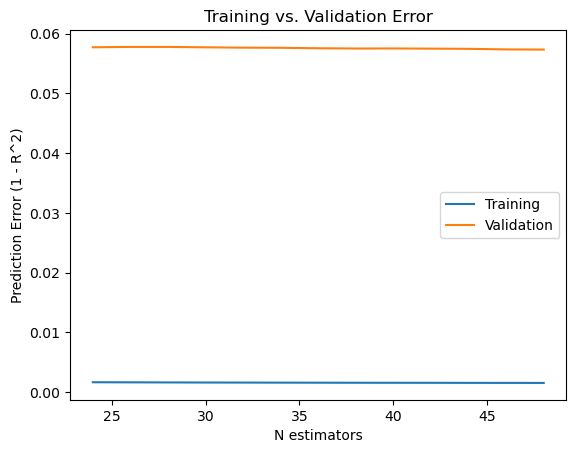

In [101]:
testing_params_df = pd.DataFrame([testing_params(RandomForestRegressor, n_estimators=2*i, n_jobs=-1 ) for i in range(12, 25)])
plt.figure()
plt.plot(testing_params_df['n_estimators'], testing_params_df['Training Error'])
plt.plot(testing_params_df['n_estimators'], testing_params_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('N estimators')
plt.ylabel('Prediction Error (1 - R^2)')
plt.legend(['Training', 'Validation'])
plt.show()

In [102]:
testing_params_df.sort_values('Validation Error', ascending=True).head(1)

,n_estimators,n_jobs,Training Error,Validation Error
12,48,-1,0.001543,0.057329


El valor óptimo para `n_stimators` es 40,  aunque disminuye mas, la reduccion es mínima

## Max_depth

In [ ]:
testing_params_df = pd.DataFrame([testing_params(RandomForestRegressor, n_estimators=40, max_depth=3*i, n_jobs=-1 ) for i in range(1, 10)])
plt.figure()
plt.plot(testing_params_df['max_depth'], testing_params_df['Training Error'])
plt.plot(testing_params_df['max_depth'], testing_params_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error (1 - R^2)')
plt.legend(['Training', 'Validation'])
plt.show()

In [104]:
testing_params_df.sort_values('Validation Error', ascending=True).head(1)

,n_estimators,max_depth,n_jobs,Training Error,Validation Error
5,40,18,-1,0.007934,0.056687


El valor óptimo para `max_depth` es **18**

## Max Leaf Nodes

In [ ]:
testing_params_df = pd.DataFrame([testing_params(RandomForestRegressor, n_estimators=40, max_depth=18, max_leaf_nodes=50*i, n_jobs=-1 ) for i in range(4, 8)])
plt.figure()
plt.plot(testing_params_df['max_leaf_nodes'], testing_params_df['Training Error'])
plt.plot(testing_params_df['max_leaf_nodes'], testing_params_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Prediction Error (1 - R^2)')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
testing_params_df.sort_values('Validation Error', ascending=True).head(1)

El valor óptimo para `n_stimators` es 40,  aunque disminuye mas, la reduccion es mínima

In [426]:
%%time
testing_model(RandomForestRegressor(random_state = 42, n_estimators=18, max_depth=18, max_leaf_nodes=340, n_jobs=-1), 'Random Forest')

Random Forest
Métricas de entrenamiento:
  - Mean Squared Error: 72.29428025050267
  - Score R²: 0.981204712149736
Métricas de validación:
  - Mean Squared Error: 122.38967148273107
  - Score R²: 0.9449284723686175
CPU times: total: 24.1 s
Wall time: 7.55 s


Con este modelo tomaremos los datos de `test_df` y cambiaremos los valores del conjunto submission para subir nuestras predicciones a kaggle y el desempeño de nuestro modelo

In [ ]:
def predict_and_submit(model, fname):
    model.fit(X_train, train_targets)
    test_preds = model.predict(X_test)
    sub_df = pd.read_csv('sample_submission.csv')
    sub_df['num_sold'] = test_preds
    sub_df.to_csv(fname, index=None)

In [ ]:
predict_and_submit(RandomForestRegressor(random_state = 42, n_estimators=18, max_depth=18, max_leaf_nodes=340, n_jobs=-1),'rf0_optimized_submission')

![](https://imgur.com/a/4zj3VpA.PNG)

<a id='c6'></a>
# <div style="text-align:center; border-radius:15px 15px; padding:15px; color:#333333; margin:0; ; padding:15px; font-size:100%; font:'Verdana'; background-color:#F5F5F5;border: 1px; overflow:hidden"><b> 6. Resultados </b></div>

### Analisis comparativo de la eficiencia de los modelos

Aqui un analisis del desempeño de las metricas para los modelos evulados:

---

### **1. Logistic Regresion & Ridge Regression**
- **$R^2$**: 80.64 %
- **MSE**: 229.421 
- **Fortalezas**:
    - Requiere un menor tiempo de entrenamiento, en promedio entre ambos modelos  toma **508 ms**
- **Debilidades**:
  - Las metricas son razonables para las predicciones aunque siguen siendo débiles para sus propósitos.
    
---

### **2. SGD Regressor**
- **$R^2$**: 79.25 %
- **MSE**: 228.195 
- **Fortalezas**:
    - Presenta una ligera mejora en el desempeño de MSE en comparacion con los modelos de regresion lineal y de Ridge. 
- **Debilidades**:
  - La cantidad de tiempo de entrenamiento es hasta casi 10 veces más en un total de **5.27 s**.
 
---

### **3. Decision Tree**
- **$R^2$**: 94.20 %
- **MSE**: 125.586
- **Fortalezas**:
    - Tiene significantemente un mejor resultado en ambas métricas a un tiempo de **1.09 s** por debajo de SGD Regressor.
    -  Captura relaciones no necesariamente lineales.
- **Debilidades**:
  - Puede presentar un sobreajuste mayor que los de los demás modelos.

---

### **4. Random Forest**
- **$R^2$**: 94.49 %
- **MSE**: 122.389 
- **Fortalezas**:
    - Tiene una gran precisión reflejada en ambas métricas.
    - Generalización mejorada debido al aprendizaje en cojunto (ensemble).
- **Debilidades**:
  - Toma demasiado tiempo en comparacion con los demas modelos. Un total de **22.4 s**

---

### **Comparación de resultados**
| Model               | MSE  (Train) | R^2 %(Train) | MSE (Validation) | R^2 %(Validation) | CPU Time                         |
|----------------------|----------|---------------------|------------------|--------------------|---------------------------------------|
| Linear Regression  | 216.211   | 83.18                | 229.425             | 80.64               | 594 ms      |
| Ridge        | 216.211  | 83.18                | 229.421             | 80.64               | 422 ms   |
|SGD Regressor       | 216.423  | 81.98                | 228.195             | 79.25               | 5.11 s   |
| Decision Tree  | 84.225 | 97.44               | 125.586             | 94.20               | 1.11 s       |
| Random Forest  | 72.294   | 98.12                | 122.389             | 94.49               | 24.1 s           |

---

### **Conclusiones**
1. **Si las metricas requieren un 80% de precision**: Use **Linear Regression** o **Ridge Regression** para un menor tiempo de entrenamiento.
2. **Para precisiones próximas al 90% y tiempo bajo de entrenamiento**: Use **Desicion Tree**.
3. **Si requiere precisiones mayores al 94% y el tiempo no es un problema**: Use **Random Forest**.

### Contacto: victorhuggh@gmail.com